<a href="https://colab.research.google.com/github/najmul19/diabetics_classification_from_daily_activities/blob/main/diabetics_classification_from_daily_activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# ***# Step 1: Data Preprocessing***



In [ ]:
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
d_types = df.dtypes
d_types

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


In [ ]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c

24206

In [ ]:
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [ ]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0          1.0       1.0        1.0  40.0     1.0     0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0   
 ...        ...       ...        ...   ...     ...     ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0   
 
         HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
 0                        0.0           0.0     0.0      1.0  ...   
 1                        0.0           1.0     0.0      0.0  ...   
 2                        0.0           0.0    

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y.head()

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [ ]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

0

In [ ]:
y.value_counts(normalize=True)

,proportion
Diabetes_binary,
0.0,0.847055
1.0,0.152945


In [ ]:
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance])

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


# ***#step2: feature analysis***


In [ ]:
import seaborn as sns

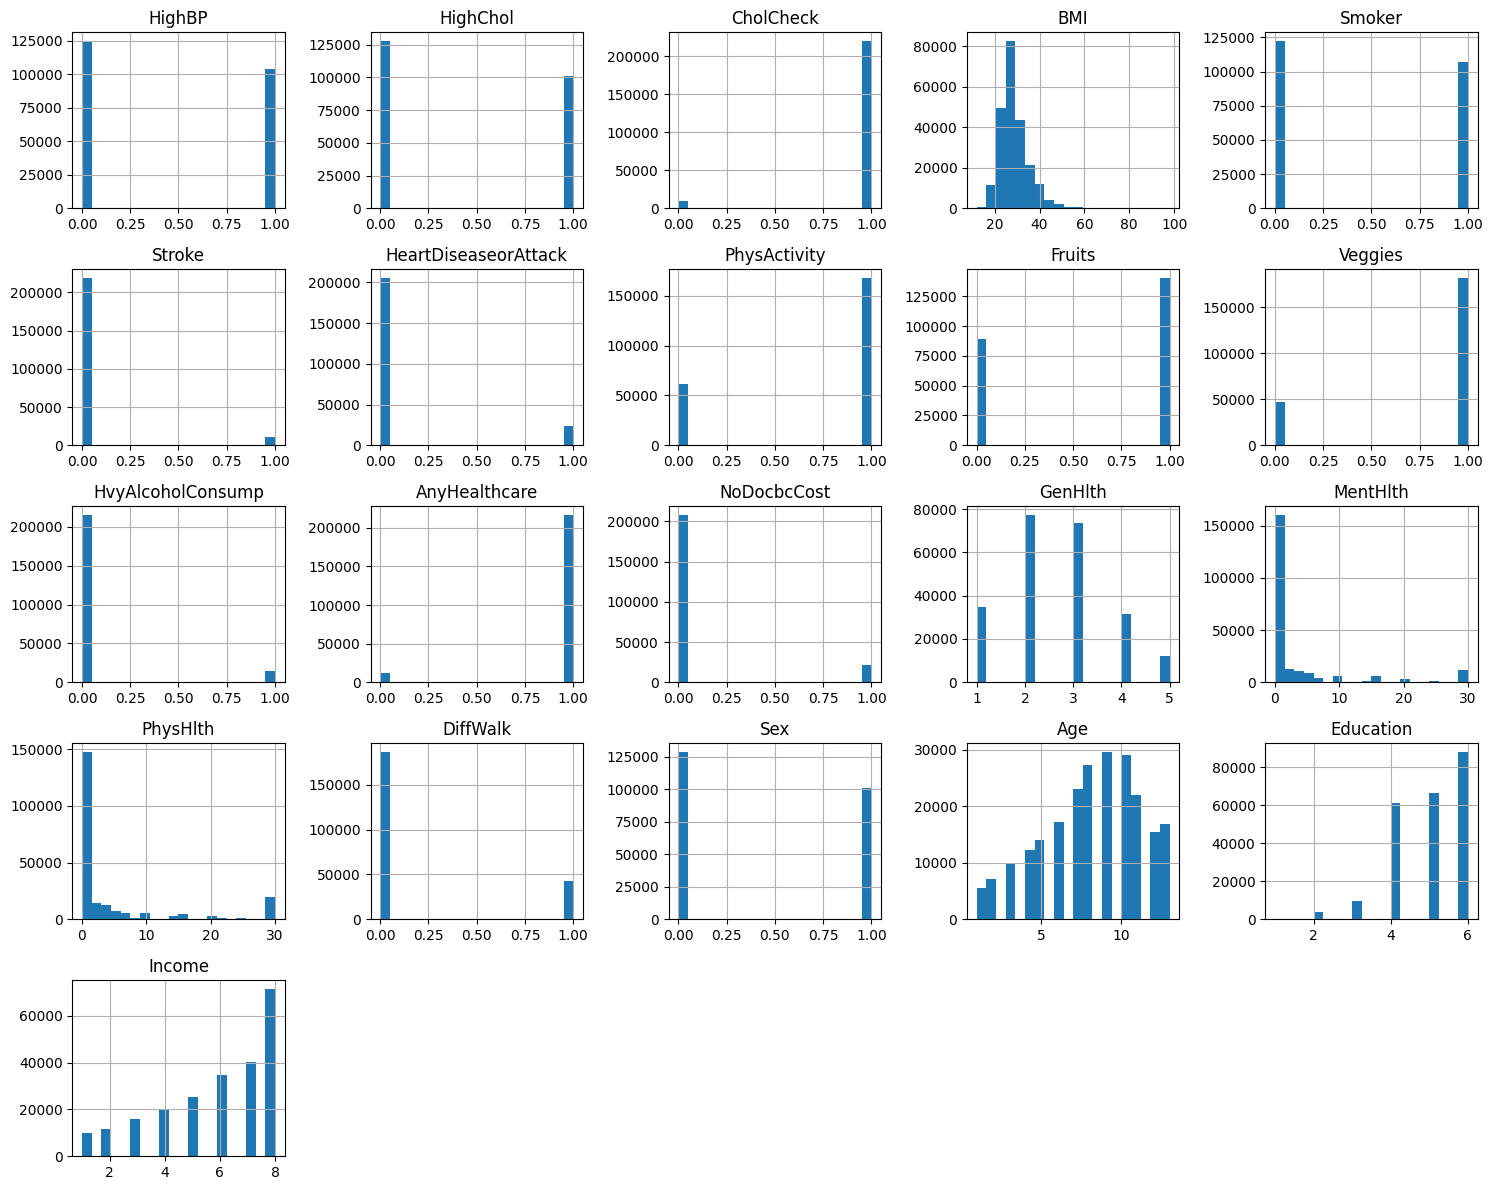

In [ ]:
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

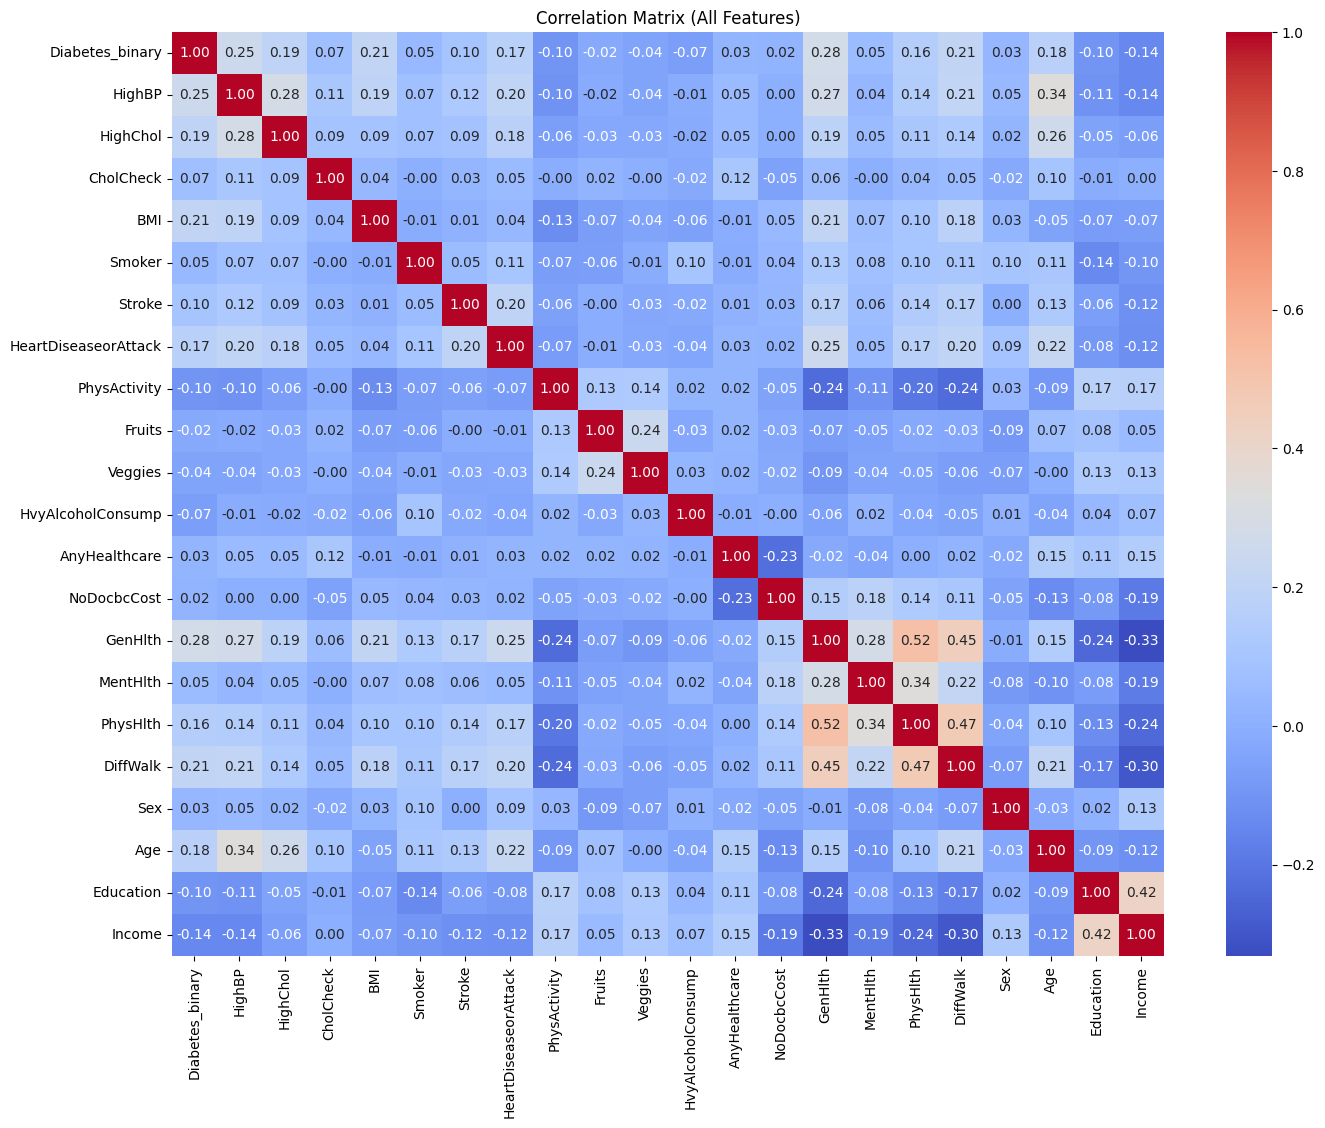

In [ ]:
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()

In [ ]:
#Correlation with Target
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [ ]:
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


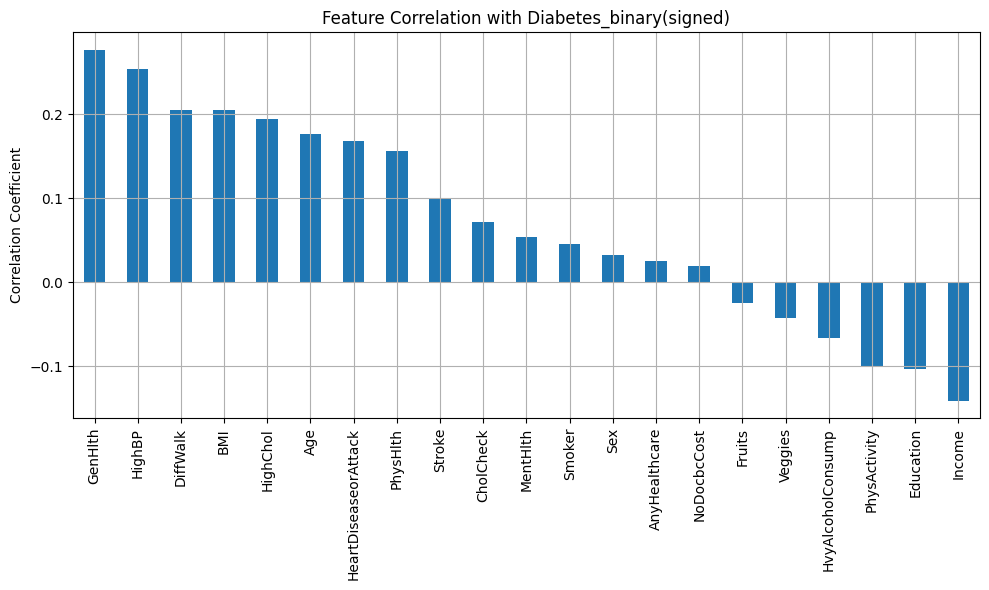

In [ ]:
#Visual correlations with target signed
plt.figure(figsize=(10, 6))
t_cor.plot(kind='bar')
plt.title("Feature Correlation with Diabetes_binary(signed)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1652439018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


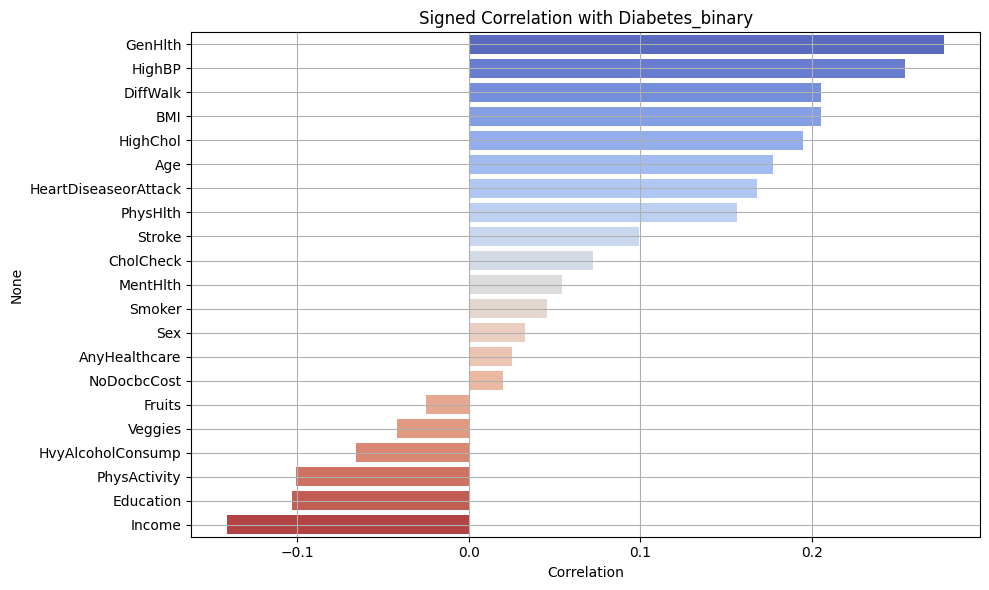

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with Diabetes_binary")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

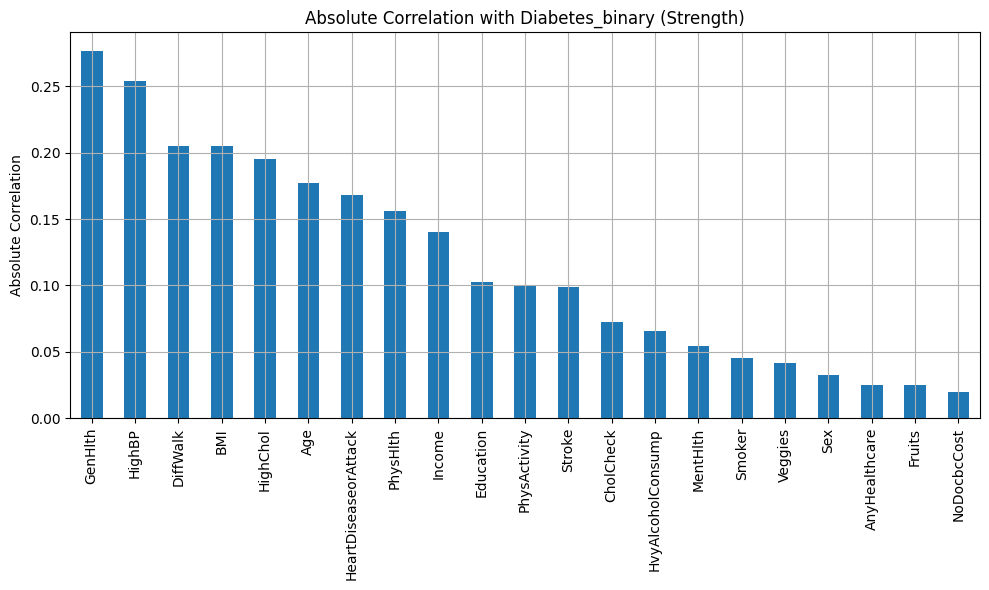

In [ ]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.ylabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3379147619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


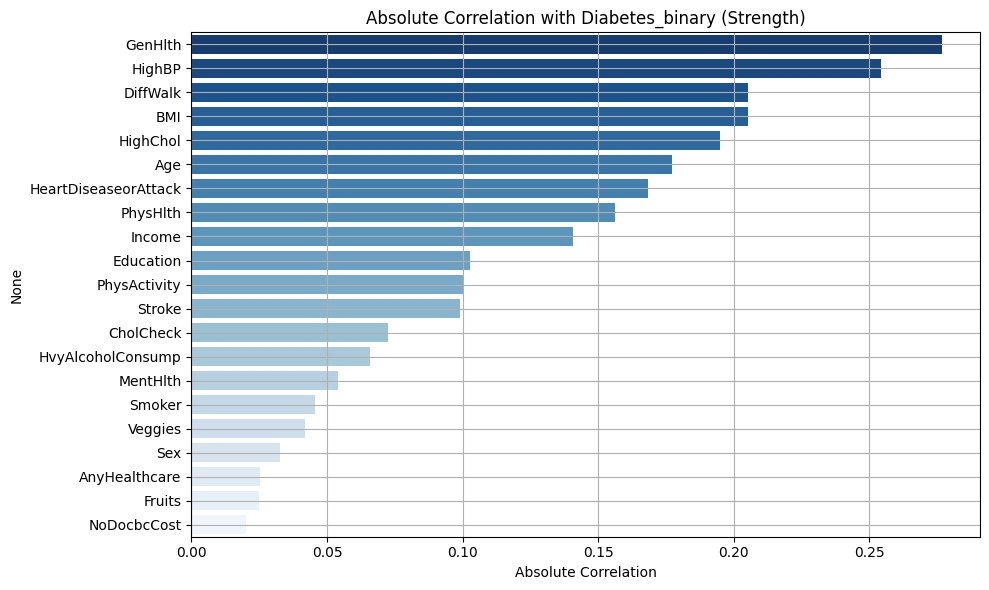

In [ ]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.xlabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))

                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


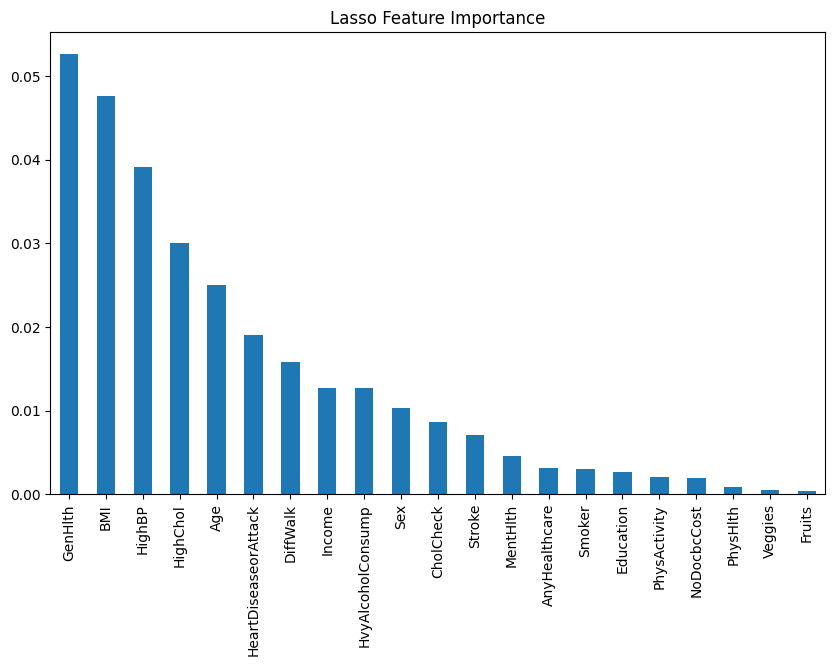

In [ ]:
#Feature Importance Using Lasso Regression(Selection)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()

In [ ]:
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())

Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


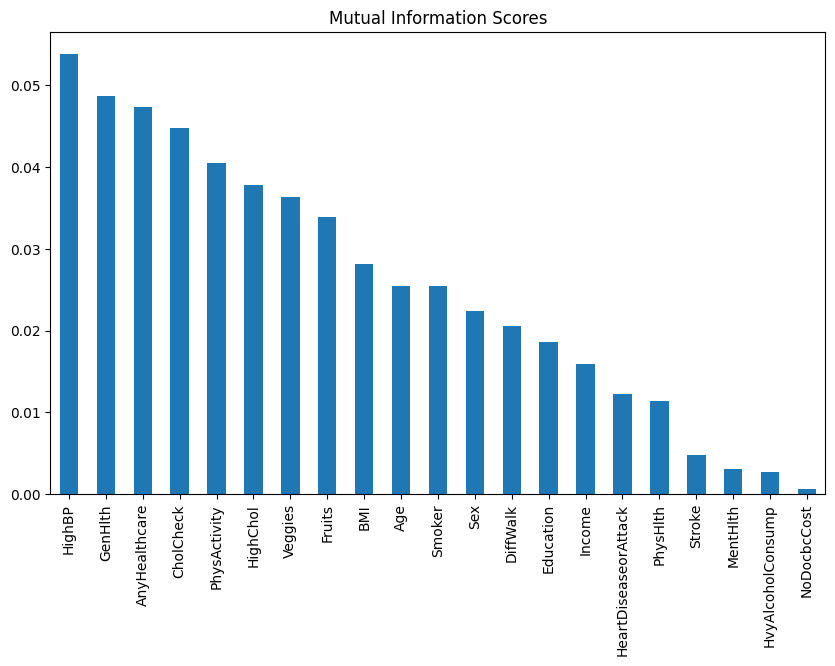

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()


# ***Combine Feature Rankings***

In [ ]:
#Convert RFE feature list into ranking
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)
#Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')


#Combine All Rankings into One DataFrame
feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

#Fill missing RFE ranks with worst rank(total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

#Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

#Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))



Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     2.0      4.0         2.33
HighBP                      3.0     1.0     10.0         4.67
Age                         5.0    10.0      2.0         5.67
BMI                         2.0     9.0      7.0         6.00
HighChol                    4.0     6.0      9.0         6.33
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    12.0      3.0         8.33
HeartDiseaseorAttack        6.0    16.0      6.0         9.33
HvyAlcoholConsump           9.0    20.0      5.0        11.33
AnyHealthcare              14.0     3.0     22.0        13.00
DiffWalk                    7.0    13.0     22.0        14.00
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    11.0     22.0        16.00
Veggies                    20.0     7.0   

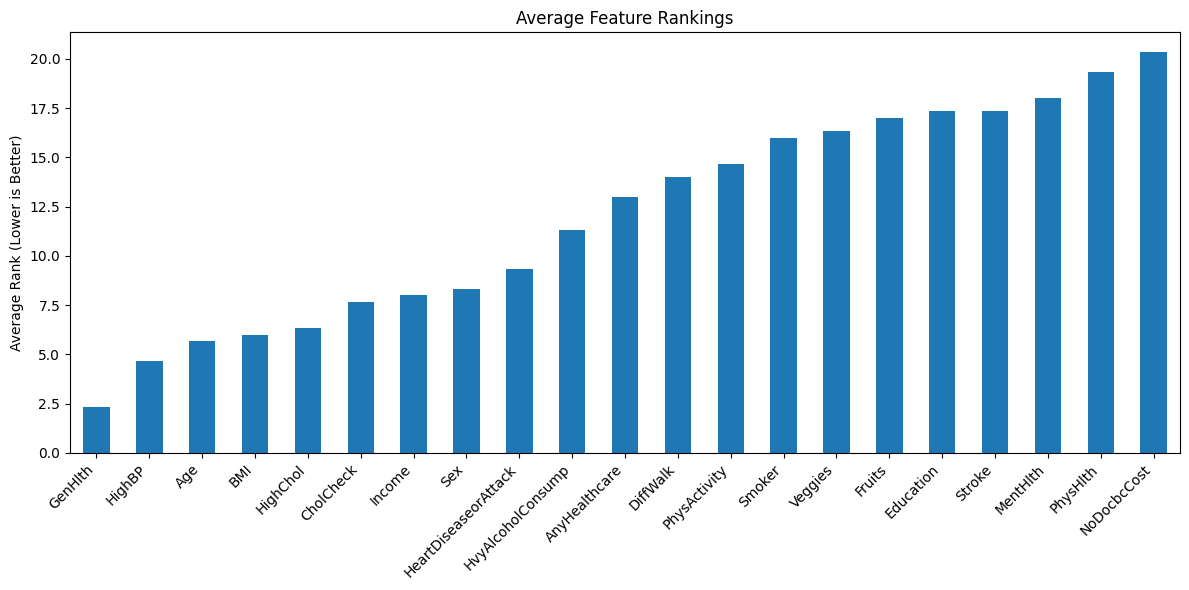

In [ ]:
#Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(12,6), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

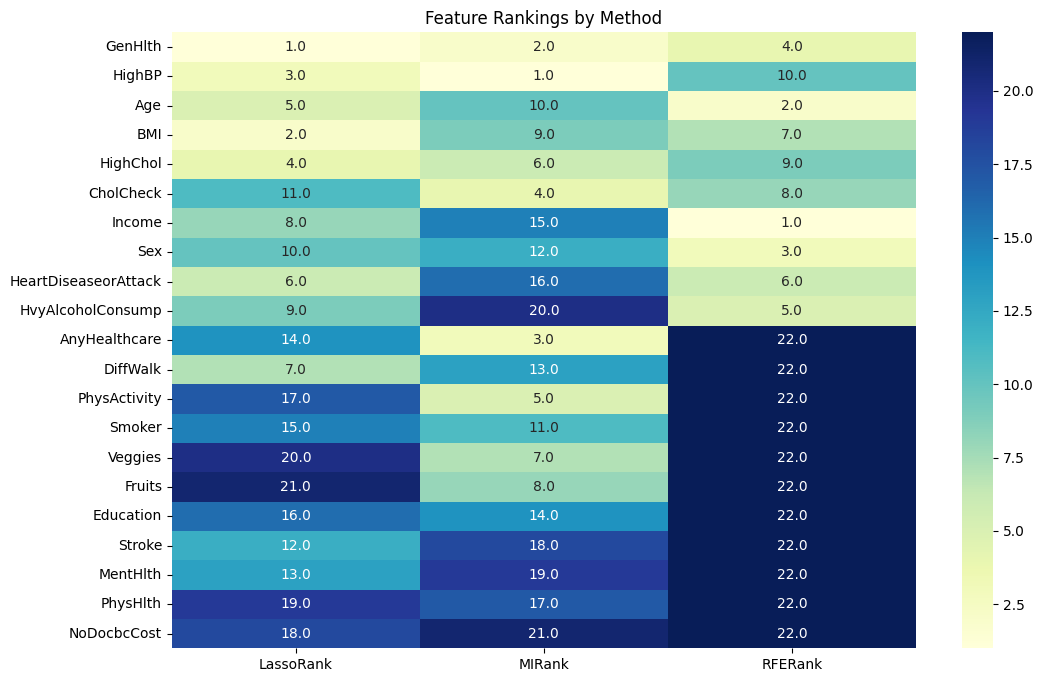

In [ ]:

ordered_df = combined_rank.sort_values('AverageRank')

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank']], annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Feature Rankings by Method")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [ ]:
#menually drop low imapacted feature
top_features = combined_rank.head(10).index.tolist()
X_selected = X[top_features]
X_selected

,GenHlth,HighBP,Age,BMI,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,9.0,40.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,7.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,9.0,28.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,11.0,27.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,11.0,24.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,5.0,45.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,11.0,18.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,2.0,28.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,7.0,23.0,0.0,1.0,1.0,1.0,0.0,0.0


Fit a new scaler on selected features:**bold text**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler_selected = StandardScaler()
#X_selected_scaled = scaler_selected.fit_transform(X_selected)

#Save this scaler
#import joblib
#joblib.dump(scaler_selected, 'scaler_selected.pkl')

## ***#Step 3: Balancing the Data using SMOTE***


In [ ]:
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


In [ ]:
#start step3 from here, with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
#for x_selected
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)

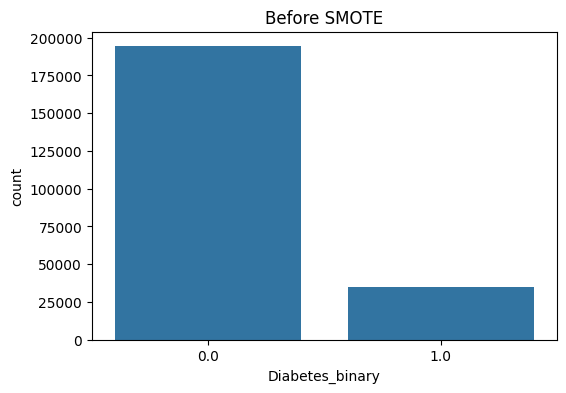

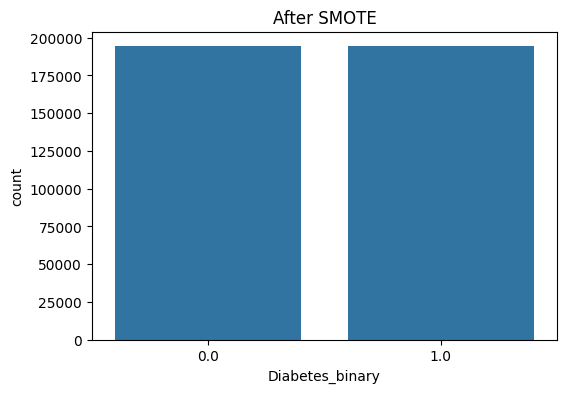

In [ ]:
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.show()

In [ ]:
print(y_resampled.value_counts(normalize=True))

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [ ]:
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)

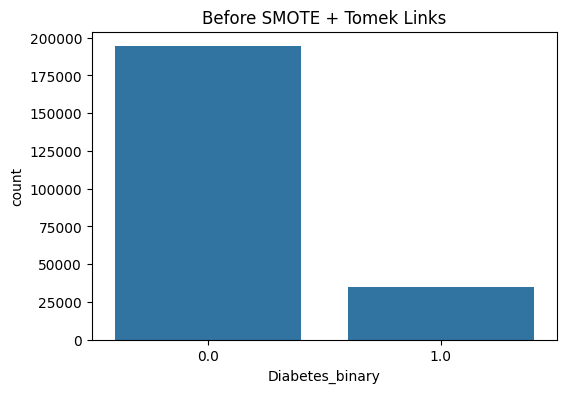

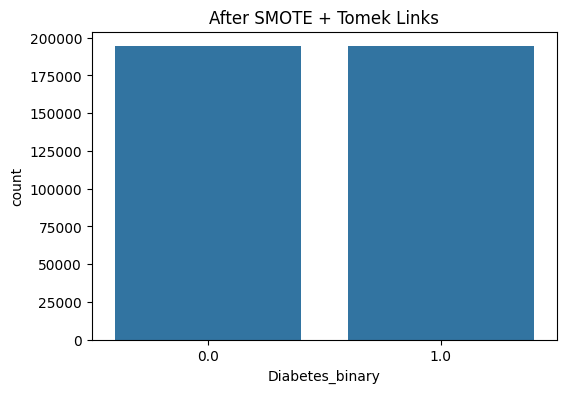

In [ ]:
# Before SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

# ***step4: Train / Test split***


In [ ]:
# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal

We’ll use train_test_split() with:80% for training and 20% for testing

stratify=y_final to preserve class balance

In [ ]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

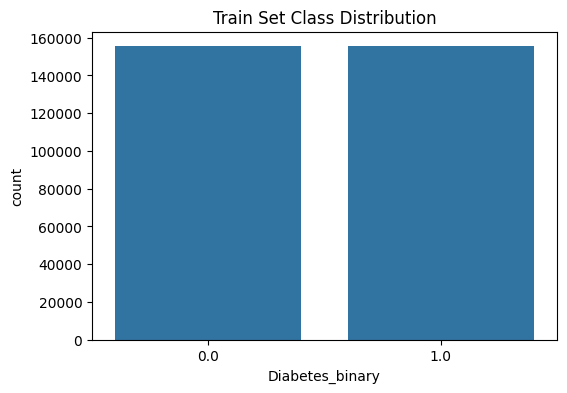

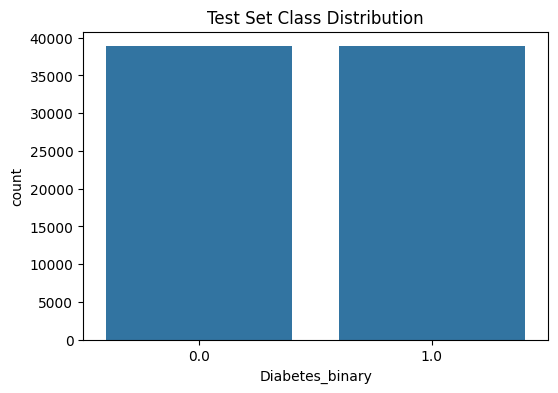

In [ ]:
# Training set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()

In [ ]:
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

Train set:
 Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Test set:
 Diabetes_binary
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [ ]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 Diabetes_binary
0.0    155468
1.0    155468
Name: count, dtype: int64

Test set count:
 Diabetes_binary
1.0    38867
0.0    38867
Name: count, dtype: int64


# ***start Step5 from here: Mdeol training***


# Accuracy=(TP+FP)/(TP+TN+FP+FN)
# Pecision=TP/(TP+FP) -> Out of all predction results , how many of them are correctly predcted
# Recall=TP/(TP+FN) -> Out of all the actual result , How many of them are correctly predicted results

In [ ]:
#1st Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

#model training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

#Prediction
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] #Only probabilities for class 1
#we can use it Plot ROC curve, AUC score and Apply custom threshold instead of default 0.5 for classification

#Evaluation metrics
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Logistic Regression Evaluation:
Accuracy: 0.7375665731854787
Precision: 0.7243482275190125
Recall: 0.7670260117837754
F1 Score: 0.745076477056883
ROC AUC Score: 0.8114355168103443


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     38867
         1.0       0.72      0.77      0.75     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted.
                    
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

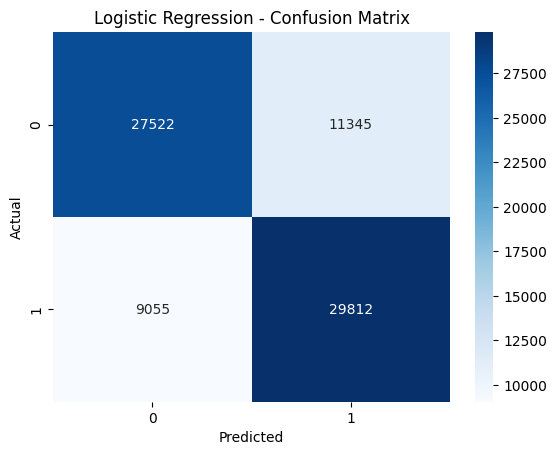

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

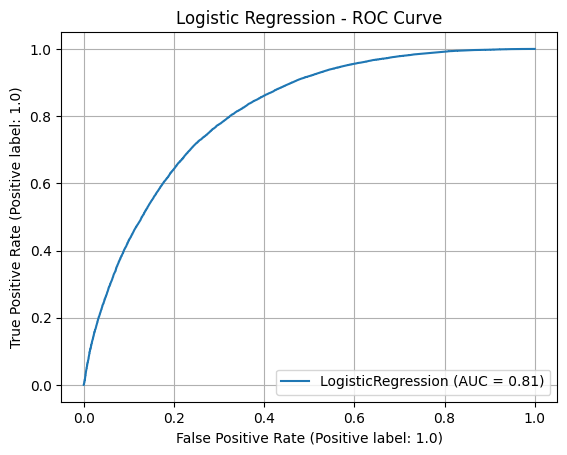

In [ ]:
#ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.grid(True)
plt.show()

In [ ]:
#2nd modeluse linear SVM Model instead of SVM model(as datasets is large)

from sklearn.svm import LinearSVC

svm_linear = LinearSVC(max_iter=10000, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#No probability output in LinearSVC, so ROC AUC won't work directly
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Linear SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))

Linear SVM Evaluation:
Accuracy: 0.7372964211284637
Precision: 0.7281113969133359
Recall: 0.7574291815679111
F1 Score: 0.7424809896720009


Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     38867
         1.0       0.73      0.76      0.74     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



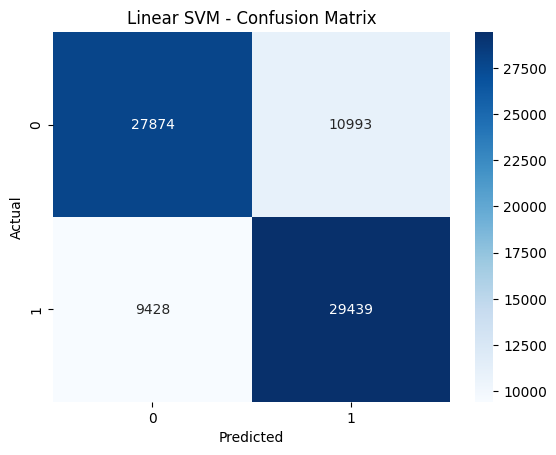

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#3rd model XGBOOST Classifier

#first we need to install xgboost
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

#Traing XGBOOST Classifier model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

#Prediction using XGBOOST Classifier model
y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:04:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Evaluation:
Accuracy: 0.8565878508760645
Precision: 0.8699319364740424
Recall: 0.8385519849743999
F1 Score: 0.8539537808520673


Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     38867
         1.0       0.87      0.84      0.85     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734



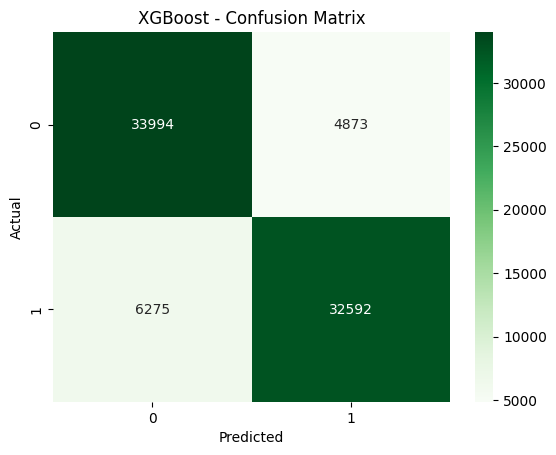

In [ ]:
#confussion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#ANN using TensorFlow

# first we need to install tensorFlow
!pip install tensorflow

In [ ]:
#import neccessery metarial for applying ANN using tensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#4th ANN architecture Define
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # input layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))  # hidden layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(1, activation='sigmoid'))  # output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model compiling
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model training
ann_history = ann_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.6747 - loss: 0.6107 - val_accuracy: 0.7352 - val_loss: 0.5377
Epoch 2/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7291 - loss: 0.5411 - val_accuracy: 0.7399 - val_loss: 0.5283
Epoch 3/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7331 - loss: 0.5343 - val_accuracy: 0.7441 - val_loss: 0.5247
Epoch 4/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7375 - loss: 0.5259 - val_accuracy: 0.7495 - val_loss: 0.5151
Epoch 5/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7393 - loss: 0.5239 - val_accuracy: 0.7467 - val_loss: 0.5112
Epoch 6/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7387 - loss: 0.5246 - val_accuracy: 0.7462 - val_loss: 0.5151
Epoch 7/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7412 - loss: 0.5223 - val_accuracy: 0.7552 - val_loss: 0.5070
Epoch 8/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7412 - loss: 0

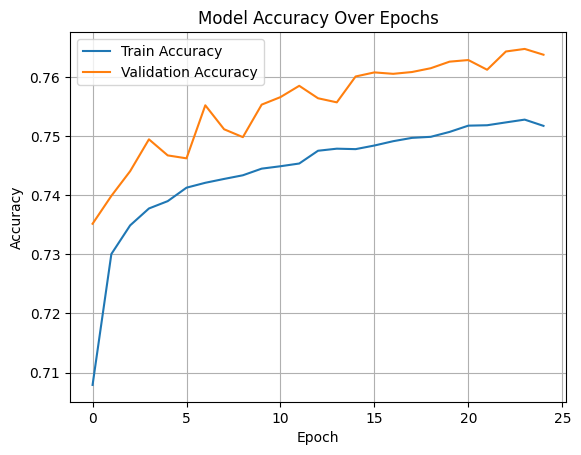

In [ ]:
#Accuracy
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

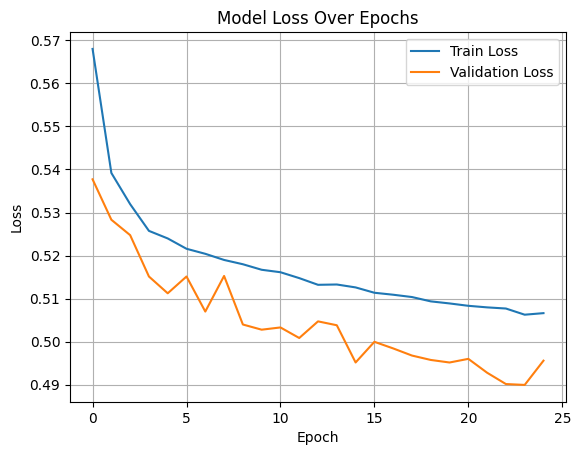

In [ ]:
#Loss
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Predictions(rounded to 0 or 1)
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("ANN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

2430/2430 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step
ANN Evaluation:
Accuracy: 0.7613595430453353
Precision: 0.7237149275426155
Recall: 0.8454947769258477
F1 Score: 0.7798794380102525

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.68      0.74     38866
         1.0       0.72      0.85      0.78     38866

    accuracy                           0.76     77732
   macro avg       0.77      0.76      0.76     77732
weighted avg       0.77      0.76      0.76     77732



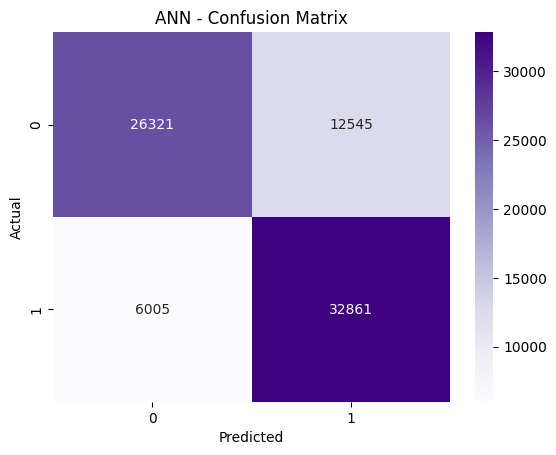

In [ ]:
#confusion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("ANN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#model training and initialization
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Prediction
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
#Evaluation
print("Random Forest Classifier Results:\n")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
print("\n\nClassification Report:\n", classification_report(y_test, rf_preds))

Random Forest Classifier Results:

[[33867  5000]
 [ 5387 33480]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38867
         1.0       0.87      0.86      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734

Accuracy: 0.8663776468469395
ROC-AUC: 0.9376558729991821


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38867
         1.0       0.87      0.86      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734



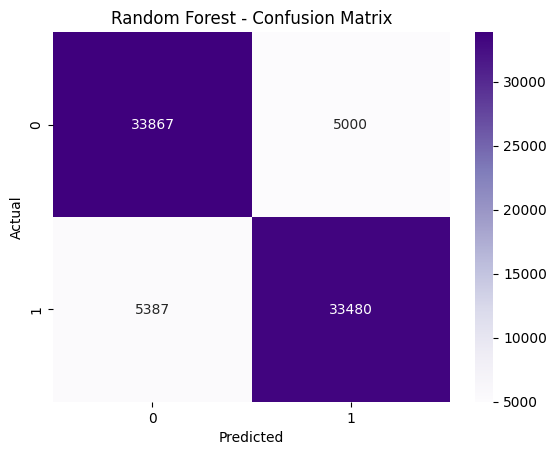

In [ ]:
#confusion metrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ***Start Step6: Hyperparmeter Tuning***

In [ ]:
#1st model logistic regression
from sklearn.model_selection import GridSearchCV

#model define
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

#hyperparameter grid define
param_grid = {
    'penalty': ['l1', 'l2'], # L1 = Lasso, L2 = Ridge
    'C': [0.01, 0.1, 1, 10, 100]  # Reguarization strength (lower =to stronger)
}

#GridSearchCV set
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
#model fiting
grid_search_lr.fit(X_train, y_train)
#best one
best_lr = grid_search_lr.best_estimator_

#Evaluation
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]


print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7373350142794659
Precision: 0.7235212871646999
Recall: 0.768235263848509
F1 Score: 0.7452081461515424
ROC-AUC Score: 0.810775316455183

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     38867
         1.0       0.72      0.77      0.75     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



In [ ]:
#2nd model linear SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

#svm = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)


#pipeline = make_pipeline(StandardScaler(), svm)

#Hyperparameter grid
#param_grid = {
    #'linearsvc__C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    #'linearsvc__loss': ['hinge', 'squared_hinge'] # Type of loss function
#}

#GridSearchCV set
#grid_search_svm = GridSearchCV(
   # estimator=pipeline,
   # param_grid=param_grid,
   # scoring='recall',
   # cv=5,
   # n_jobs=-1,
   # verbose=1
#)

In [ ]:
#grid_search_svm.fit(X_train, y_train)

#Best one
#best_svm = grid_search_svm.best_estimator_

#Prediction
#y_pred_svm = best_svm.predict(X_test)

#Evaluation

#print("Best Hyperparameters:", grid_search_svm.best_params_)
#print("Accuracy:", accuracy_score(y_test, y_pred_svm))
#print("Precision:", precision_score(y_test, y_pred_svm))
#print("Recall:", recall_score(y_test, y_pred_svm))
#print("F1 Score:", f1_score(y_test, y_pred_svm))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
#3rd model XGBOOST classifier

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


#Create XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
}

#Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [ ]:
xgb_random_search.fit(X_train, y_train)

best_xgb = xgb_random_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:44:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#Evaluation
print("Best Hyperparameters:", xgb_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy: 0.8428100959683021
Precision: 0.8380181642904257
Recall: 0.8498983713690277
F1 Score: 0.8439164590917801

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84     38867
         1.0       0.84      0.85      0.84     38867

    accuracy                           0.84     77734
   macro avg       0.84      0.84      0.84     77734
weighted avg       0.84      0.84      0.84     77734



In [ ]:
#5th Model Random Forest

#Base model
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

#Random Search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_

#Prediction
y_pred_rf = best_rf.predict(X_test)

#Evaluation
print("Best Hyperparameters:", rf_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Accuracy: 0.8512362672704351
Precision: 0.8379502413665058
Recall: 0.8708930455141894
F1 Score: 0.8541041104186118

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85     38867
         1.0       0.84      0.87      0.85     38867

    accuracy                           0.85     77734
   macro avg       0.85      0.85      0.85     77734
weighted avg       0.85      0.85      0.85     77734



In [ ]:
#2nd model Linear Support Vector Classifier small version(updated version)
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100],
    'linearsvc__loss': ['hinge', 'squared_hinge']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Try fewer combinations
    scoring='recall',
    cv=3,  # Reduce folds to 3
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('linearsvc',
                                              LinearSVC(class_weight='balanced',
                                                        max_iter=10000,
                                                        random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.01, 0.1, 1, 10, 100],
                                        'linearsvc__loss': ['hinge',
                                                            'squared_hinge']},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)


In [ ]:
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'linearsvc__loss': 'hinge', 'linearsvc__C': 100}
Accuracy: 0.7359971183780585
Precision: 0.713706577199972
Recall: 0.7881493297656109
F1 Score: 0.7490829950603999

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.68      0.72     38867
         1.0       0.71      0.79      0.75     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



# ***step 7: bar chart for comparison the perfomace of all***

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10'] 




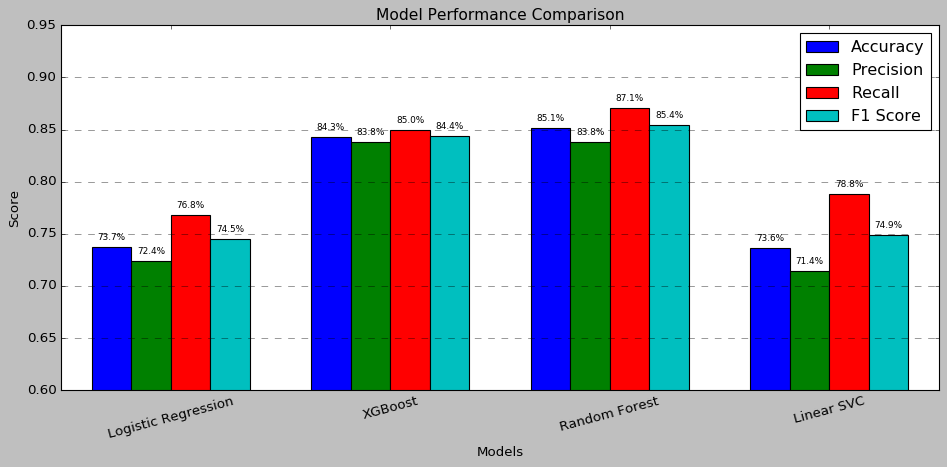

In [ ]:
models = ['Logistic Regression', 'XGBoost', 'Random Forest', 'Linear SVC']

#Metrics
accuracy = [0.7373, 0.8428, 0.8512, 0.7360]
precision = [0.7235, 0.8380, 0.8380, 0.7137]
recall = [0.7682, 0.8499, 0.8709, 0.7881]
f1 = [0.7452, 0.8439, 0.8541, 0.7491]


bar_width = 0.18
x = np.arange(len(models))

print(plt.style.available,"\n\n")
plt.style.use('classic')
plt.figure(figsize=(12, 6))


bars1 = plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, label='Accuracy')
bars2 = plt.bar(x - 0.5 * bar_width, precision, width=bar_width, label='Precision')
bars3 = plt.bar(x + 0.5 * bar_width, recall, width=bar_width, label='Recall')
bars4 = plt.bar(x + 1.5 * bar_width, f1, width=bar_width, label='F1 Score')

# Function for %
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
                 f'{height*100:.1f}%', ha='center', va='bottom', fontsize=8)


annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)
annotate_bars(bars4)

#Labels & style
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(x, models, rotation=15)
plt.ylim(0.6, 0.95)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# ***Final model training on full train set***

In [ ]:
#Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

#Final model with best hyperparameters
final_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42
)

final_rf.fit(X_train, y_train)

y_pred = final_rf.predict(X_test)
y_prob = final_rf.predict_proba(X_test)[:, 1]

#Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

#ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85     38867
         1.0       0.84      0.87      0.85     38867

    accuracy                           0.85     77734
   macro avg       0.85      0.85      0.85     77734
weighted avg       0.85      0.85      0.85     77734

ROC-AUC Score: 0.9319957123257806


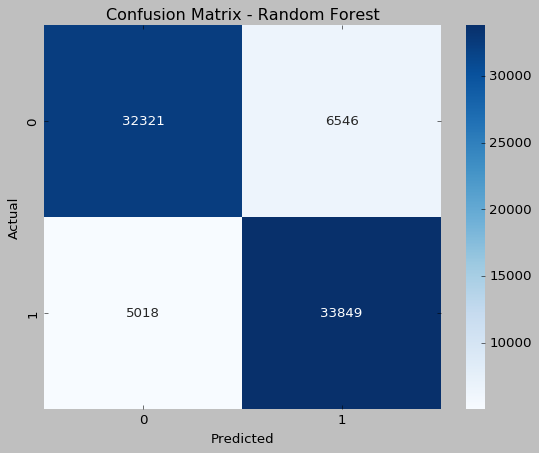

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

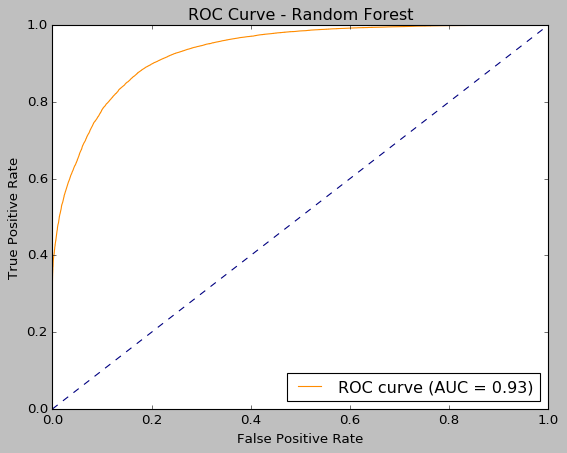

In [ ]:
#roc Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# ***Feature Importance for Final Random Forest Model***

In [ ]:
feature_importance = final_rf.feature_importances_

#Create DataFrame (twill match 10 selected features in X_train)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                Feature  Importance
0               GenHlth    0.217349
1                HighBP    0.203802
4              HighChol    0.131238
3                   BMI    0.129971
2                   Age    0.124298
6                Income    0.061352
7                   Sex    0.053016
8  HeartDiseaseorAttack    0.038503
9     HvyAlcoholConsump    0.029637
5             CholCheck    0.010834


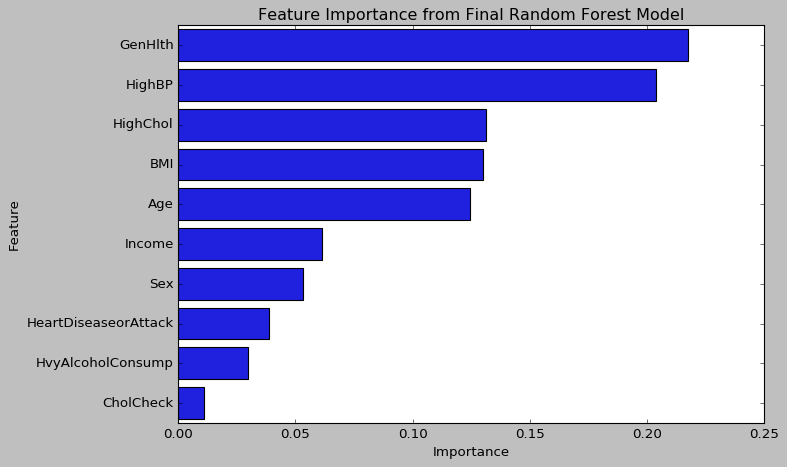

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Final Random Forest Model')
plt.tight_layout()
plt.show()

**Save Test Predictions to CSV**

In [ ]:
y_pred = final_rf.predict(X_test)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df.to_csv("rf_predictions.csv", index=False)


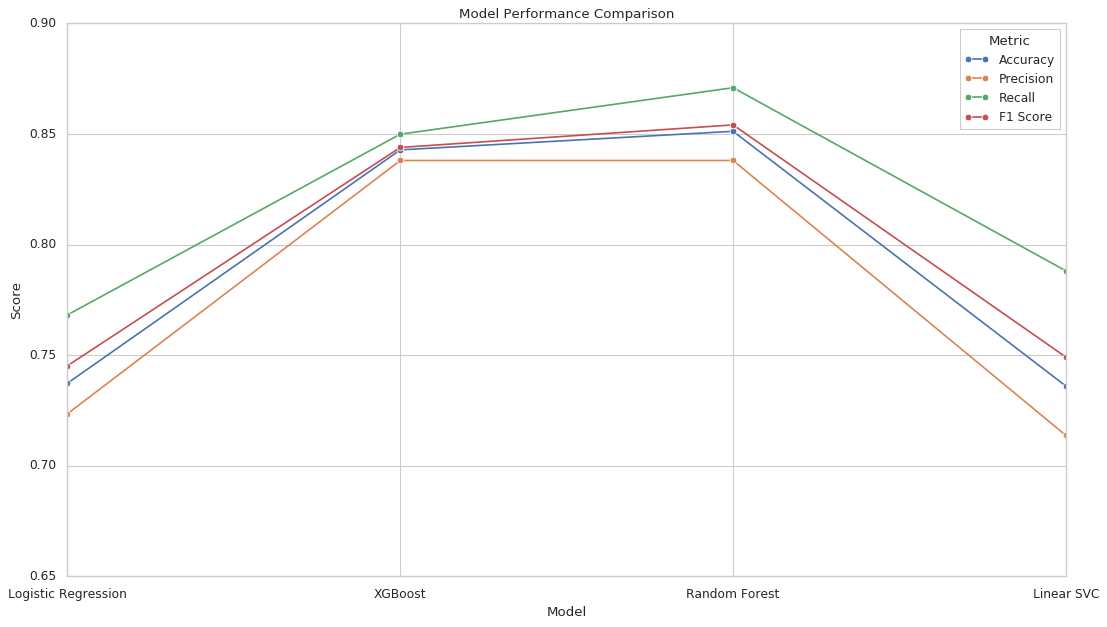

In [ ]:
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'Linear SVC'],
    'Accuracy': [0.7373, 0.8428, 0.8512, 0.7360],
    'Precision': [0.7235, 0.8380, 0.8380, 0.7137],
    'Recall': [0.7682, 0.8499, 0.8709, 0.7881],
    'F1 Score': [0.7452, 0.8439, 0.8541, 0.7491]
}

df = pd.DataFrame(data)


sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

#plot each metrix
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    sns.lineplot(data=df, x='Model', y=metric, marker='o', label=metric)

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.65, 0.9)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# ***Final step(model) Voting Ensemble (Random Forest + XGBoost)***

In [ ]:
from sklearn.ensemble import VotingClassifier

#Best XGBoost model
xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

#Best Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

#Voting classifier
ensemble = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')


ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:32:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print(type(f1_score))


<class 'function'>


In [ ]:
# Evaluation
from sklearn.metrics import f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8502199809607122
Precision: 0.8417867724602018
Recall: 0.8625569248977282
F1 Score: 0.8520452899241355

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     38867
         1.0       0.84      0.86      0.85     38867

    accuracy                           0.85     77734
   macro avg       0.85      0.85      0.85     77734
weighted avg       0.85      0.85      0.85     77734



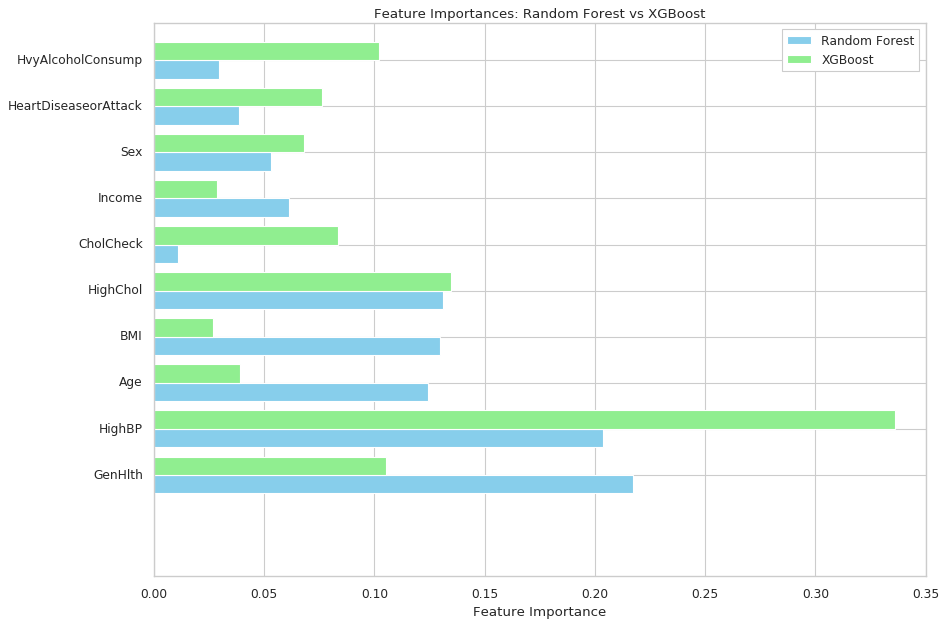

In [ ]:
#Get trained ensmble modl
rf_trained = ensemble.named_estimators_['rf']
xgb_trained = ensemble.named_estimators_['xgb']

#Get importance feature
rf_importance = rf_trained.feature_importances_
xgb_importance = xgb_trained.feature_importances_

features = X_train.columns

plt.figure(figsize=(12, 8))
bar_width = 0.4
indices = np.arange(len(features))

#RF importances
plt.barh(indices, rf_importance, bar_width, label='Random Forest', color='skyblue')

#Plot XGB importances
plt.barh(indices + bar_width, xgb_importance, bar_width, label='XGBoost', color='lightgreen')

plt.yticks(indices + bar_width / 2, features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances: Random Forest vs XGBoost')
plt.legend()
plt.tight_layout()
plt.show()


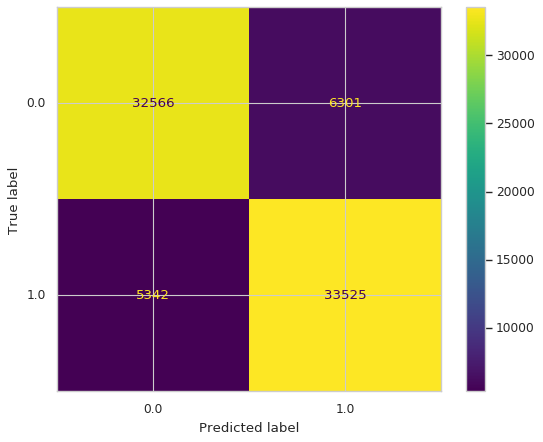

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ensemble, X_test, y_test)


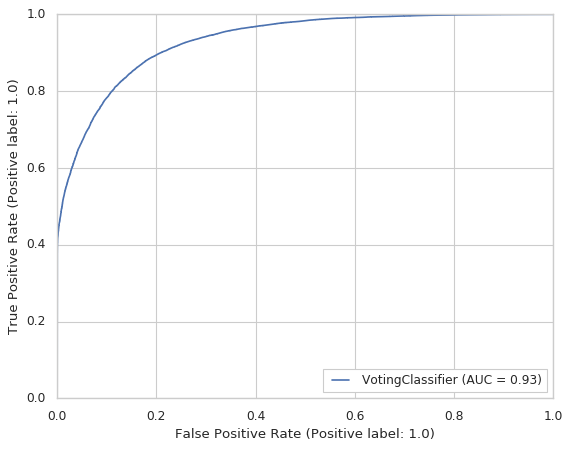

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(ensemble, X_test, y_test)

# ***Save the finel model(ensamble) in joblib***

In [ ]:
import joblib
joblib.dump(ensemble, 'voting_ensemble_model.pkl')

NameError: name 'ensemble' is not defined

# ***for loading this in future->***
ensemble = joblib.load('voting_ensemble_model.pkl')


# ***create a file app.py andload the save voting ensamble filefor making app***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load
model = joblib.load('voting_ensemble_model.pkl')

st.title("Ensemble Model Prediction")

uploaded_file = st.file_uploader("Upload CSV file with features", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    predictions = model.predict(df)
    st.write("Predictions:")
    st.write(predictions)


Writing app.py


In [ ]:
!pip install streamlit pyngrok --quiet

# ***here is my authnotaion code streamlit or ngrok app***

In [ ]:
!ngrok config add-authtoken 30yA8FYp3MqZJrmijRZ9sPxckot_4ZVm5mPBbkBDCD9xDU9oC

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# ***make a live app***

In [ ]:
from pyngrok import ngrok
get_ipython().system_raw('streamlit run app.py &')
#public_url = ngrok.connect(port='8501')
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://464b8055eb6a.ngrok-free.app" -> "http://localhost:8501"
